# **EDA**

##### Load dataset

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
# train_path = '/content/train.csv'
# test_path = '/content/test.csv'

train_path = '/content/train_edit.csv'
test_path = '/content/test_edit.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
# Drop column
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Look over train set
print(train.info(), "\n")
# print(train.head(), "\n")
# print(train.describe(), "\n")
print(f"Shape of train data: {train.shape}\n")                              # shape
print(f"Missing values of train data:\n{train.isna().sum()}\n")             # missing values
print(f"Duplicated values of train data: {train[train.duplicated()]}")      # duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       10000 non-null  int64  
 1   Sex             10000 non-null  object 
 2   Race            10000 non-null  object 
 3   Housing         10000 non-null  object 
 4   Delay           10000 non-null  object 
 5   Anhedonia       10000 non-null  float64
 6   DepMood         10000 non-null  float64
 7   Sleep           10000 non-null  float64
 8   Tired           10000 non-null  float64
 9   Appetite        10000 non-null  float64
 10  Rumination      10000 non-null  float64
 11  Concentration   10000 non-null  float64
 12  Psychomotor     10000 non-null  float64
 13  Delusion        10000 non-null  float64
 14  Suspicious      10000 non-null  float64
 15  Withdrawal      10000 non-null  float64
 16  Passive         10000 non-null  float64
 17  Tension         10000 non-null  

In [ ]:
# Look over test set
print(test.info(), "\n")
# print(test.head(), "\n")
# print(test.describe(), "\n")
print(f"Shape of test data: {test.shape}\n")                            # shape
print(f"Missing values of test data:\n{test.isna().sum()}\n")           # missing values
print(f"Duplicated values of test data: {test[test.duplicated()]}")     # duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       1000 non-null   int64  
 1   Sex             1000 non-null   object 
 2   Race            1000 non-null   object 
 3   Housing         1000 non-null   object 
 4   Delay           1000 non-null   object 
 5   Anhedonia       1000 non-null   float64
 6   DepMood         1000 non-null   float64
 7   Sleep           1000 non-null   float64
 8   Tired           1000 non-null   float64
 9   Appetite        1000 non-null   float64
 10  Rumination      1000 non-null   float64
 11  Concentration   1000 non-null   float64
 12  Psychomotor     1000 non-null   float64
 13  Delusion        1000 non-null   float64
 14  Suspicious      1000 non-null   float64
 15  Withdrawal      1000 non-null   float64
 16  Passive         1000 non-null   float64
 17  Tension         1000 non-null   fl

In [ ]:
# Combine train set and test set
data = pd.concat([train, test], axis=0)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       11000 non-null  int64  
 1   Sex             11000 non-null  object 
 2   Race            11000 non-null  object 
 3   Housing         11000 non-null  object 
 4   Delay           11000 non-null  object 
 5   Anhedonia       11000 non-null  float64
 6   DepMood         11000 non-null  float64
 7   Sleep           11000 non-null  float64
 8   Tired           11000 non-null  float64
 9   Appetite        11000 non-null  float64
 10  Rumination      11000 non-null  float64
 11  Concentration   11000 non-null  float64
 12  Psychomotor     11000 non-null  float64
 13  Delusion        11000 non-null  float64
 14  Suspicious      11000 non-null  float64
 15  Withdrawal      11000 non-null  float64
 16  Passive         11000 non-null  float64
 17  Tension         11000 non-null  f

##### 비대칭 클래스 아님을 확인

In [ ]:
print(data['Diagnosis'].value_counts())

1    5624
0    5376
Name: Diagnosis, dtype: int64


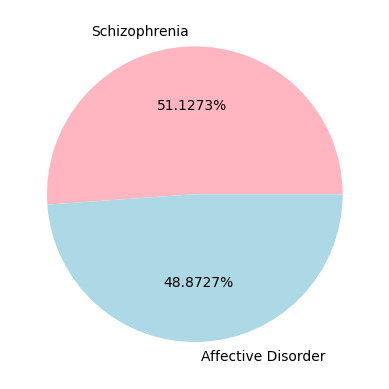

In [ ]:
# Visualize ratio of target class
rat = [5624, 5376]
plt.pie(rat, labels=['Schizophrenia', 'Affective Disorder'], autopct='%.4f%%', colors=['lightpink', 'lightblue'])
plt.show()

### **상관관계 분석**

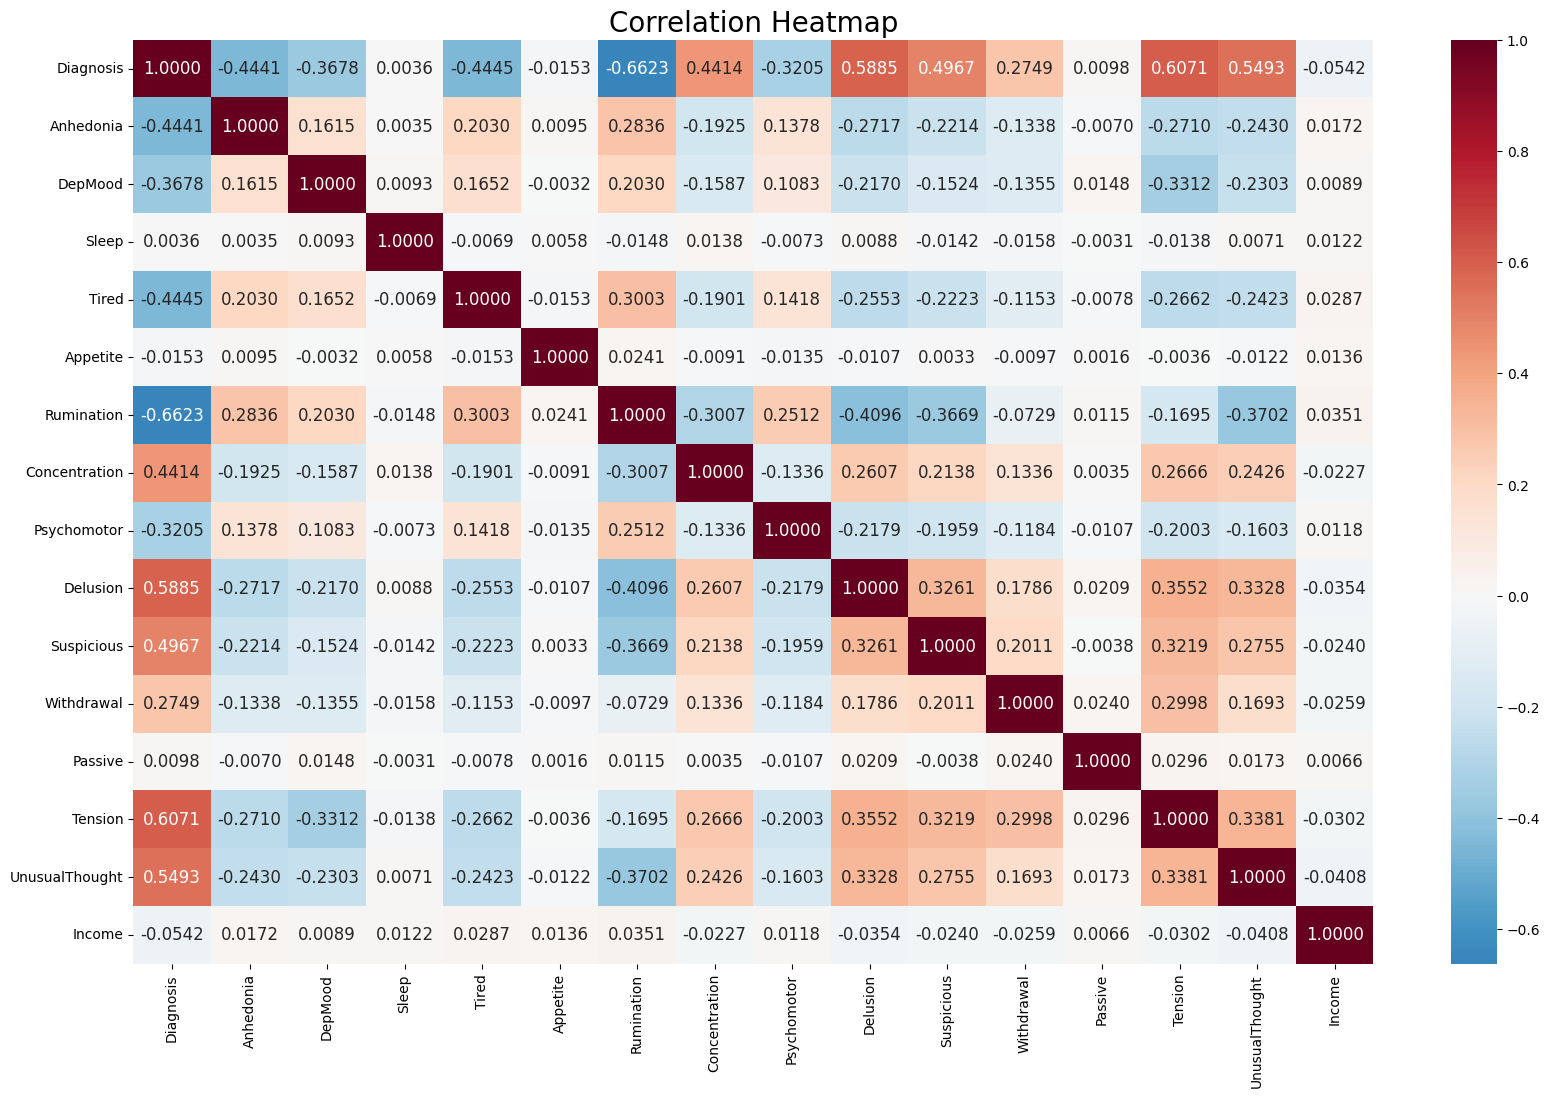

In [ ]:
# Correlation heatmap for train set
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.4f', cmap='RdBu_r', center=0, annot_kws={"fontsize":12})
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [ ]:
# Show distribution of classes using pair plot
def plot_pairplots(df):
    for col in df.columns[1:]:  # except 'Diagnosis'
        sns.pairplot(data, vars=['Diagnosis', col], hue='Diagnosis')
        plt.title(f'Pairplot of {col} by Diagnosis Type')
        plt.show()

numerical_columns = ['Diagnosis', 'Anhedonia', 'DepMood', 'Sleep', 'Tired', 'Appetite', 'Rumination', 'Concentration', 'Psychomotor', 'Delusion', 'Suspicious', 'Withdrawal', 'Passive', 'Tension', 'UnusualThought', 'Income']
plot_pairplots(data[numerical_columns])

In [ ]:
# Show distribution of classes using pair plot
sns.pairplot(data, hue='Diagnosis')
plt.show()

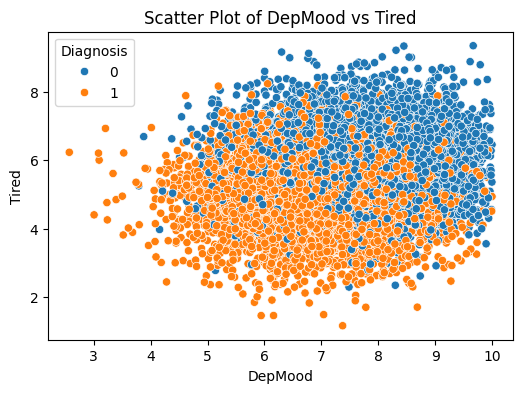

In [ ]:
# Show distribution of classes by depmood adn tired using scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='DepMood', y='Tired', hue='Diagnosis', data=data)
plt.title('Scatter Plot of DepMood vs Tired')
plt.show()

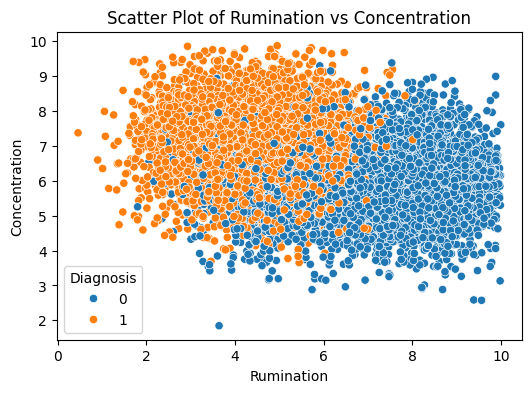

In [ ]:
# Show distribution of classes by rumination and concentration using scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Rumination', y='Concentration', hue='Diagnosis', data=data)
plt.title('Scatter Plot of Rumination vs Concentration')
plt.show()

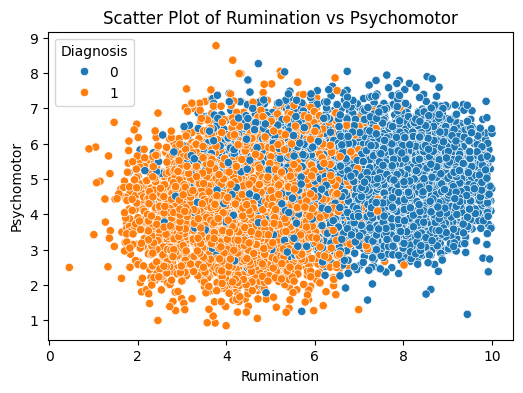

In [ ]:
# Show distribution of classes by rumination and psychomotor using scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Rumination', y='Psychomotor', hue='Diagnosis', data=data)
plt.title('Scatter Plot of Rumination vs Psychomotor')
plt.show()

### **시각화**

In [ ]:
# Tired, Concentration, Psychomotor, Delusion, Suspicious, Withdrawal, UnusualThought

In [ ]:
# Define a function that makes derived variable
def category(x):
    if x < 1:
        return 0
    elif x < 2:
        return 1
    elif x < 3:
        return 2
    elif x < 4:
        return 3
    elif x < 5:
        return 4
    elif x < 6:
        return 5
    elif x < 7:
        return 6
    elif x < 8:
        return 7
    elif x < 9:
        return 8
    else:
        return 9

##### Anhedonia vs Diagnosis

In [ ]:
print('Maximum of Anhedonia:', data['Anhedonia'].max())
print('Minimum of Anhedonia:', data['Anhedonia'].min())

Maximum of Anhedonia: 9.939765869
Minimum of Anhedonia: 2.361254037


In [ ]:
for i in range(2, 10):
    for j in range(0, 2):
        print(len(data[(data['Anhedonia_derived'] == i) & (data['Diagnosis'] == j)]))

1
3
7
128
121
747
762
1929
1814
1929
1814
778
726
106
131
4


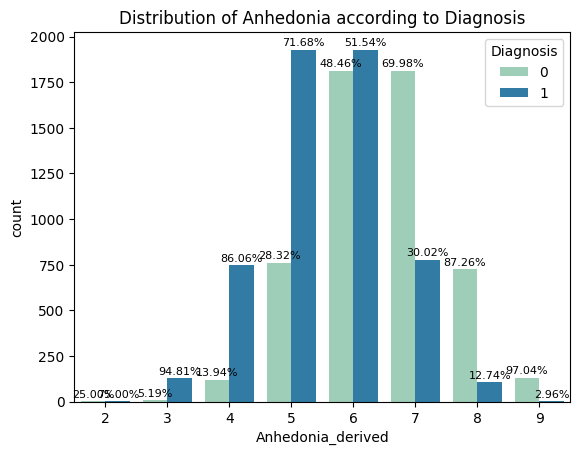

In [ ]:
# Make derived variable of 'Anhedonia'
data['Anhedonia_derived'] = data['Anhedonia'].apply(category)

ax = sns.countplot(x='Anhedonia_derived', hue="Diagnosis", data=data, palette='YlGnBu')
Anhedonia_value = 2
Diagnosis_value = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Anhedonia_derived'] == Anhedonia_value])
    rat = len(data[(data['Anhedonia_derived'] == Anhedonia_value) & (data['Diagnosis'] == Diagnosis_value)])
    if (rat == 0):
        Anhedonia_value += 1
        sum = len(data.loc[data['Tension_derived'] == Anhedonia_value])
        rat = len(data[(data['Tension_derived'] == Anhedonia_value) & (data['Diagnosis'] == Diagnosis_value)])
    if ((iteration_value < 16) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Anhedonia_value += 1
        iteration_value += 1
    if (Anhedonia_value > 9):
        Anhedonia_value = 2
        Diagnosis_value = 1
plt.title('Distribution of Anhedonia according to Diagnosis')
plt.show()

##### DepMood vs Diagnosis

In [ ]:
print('Maximum of DepMood:', data['DepMood'].max())
print('Minimum of DepMood:', data['DepMood'].min())

Maximum of DepMood: 9.996839747
Minimum of DepMood: 2.57201816


In [ ]:
for i in range(2, 10):
    for j in range(0, 2):
        print(len(data[(data['DepMood_derived'] == i) & (data['Diagnosis'] == j)]))

0
1
2
19
28
167
241
906
983
1911
1882
1711
1554
777
686
132


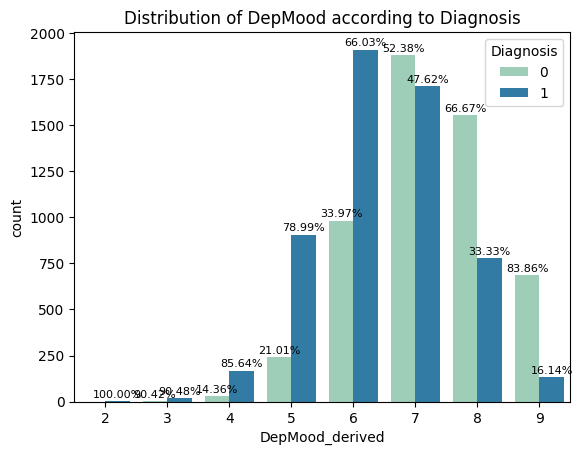

In [ ]:
# Make derived variable of 'DepMood'
data['DepMood_derived'] = data['DepMood'].apply(category)

ax = sns.countplot(x='DepMood_derived', hue="Diagnosis", data=data, palette='YlGnBu')
DepMood_value = 2
Diagnosis_value = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['DepMood_derived'] == DepMood_value])
    rat = len(data[(data['DepMood_derived'] == DepMood_value) & (data['Diagnosis'] == Diagnosis_value)])
    if (rat == 0):
        DepMood_value += 1
        sum = len(data.loc[data['Tension_derived'] == DepMood_value])
        rat = len(data[(data['Tension_derived'] == DepMood_value) & (data['Diagnosis'] == Diagnosis_value)])
    if ((iteration_value < 15) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        DepMood_value += 1
        iteration_value += 1
    if (DepMood_value > 9):
        DepMood_value = 2
        Diagnosis_value = 1
plt.title('Distribution of DepMood according to Diagnosis')
plt.show()

##### Race vs Diagnosis

In [ ]:
Race_value = ['Asian', 'Hispanic', 'Black', 'White']
for i in range(0, 4):
    for j in range(0, 2):
        print(len(data[(data['Race'] == Race_value[i]) & (data['Diagnosis'] == j)]))

944
699
874
679
1354
2424
2204
1822


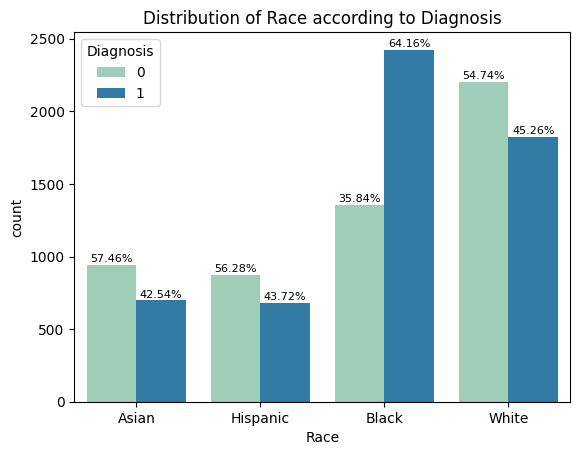

In [ ]:
ax = sns.countplot(x='Race', hue="Diagnosis", data=data, palette='YlGnBu')
Race_value = ['Asian', 'Hispanic', 'Black', 'White']
Race_index = 0
Diagnosis_value = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Race'] == Race_value[Race_index]])
    rat = len(data[(data['Race'] == Race_value[Race_index]) & (data['Diagnosis'] == Diagnosis_value)])
    if ((iteration_value < 8) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Race_index += 1
        iteration_value += 1
    if (Race_index > 3):
        Race_index = 0
        Diagnosis_value = 1
plt.title('Distribution of Race according to Diagnosis')
plt.show()

##### Rumination vs Diagnosis

In [ ]:
print('Maximum of Rumination:', data['Rumination'].max())
print('Minimum of Rumination:', data['Rumination'].min())

Maximum of Rumination: 9.999307373
Minimum of Rumination: 0.457384236


In [ ]:
for i in range(0, 10):
    for j in range(0, 2):
        print(len(data[(data['Rumination_derived'] == i) & (data['Diagnosis'] == j)]))

0
2
1
73
29
498
221
1395
633
1926
734
1264
786
408
1302
53
1176
5
494
0


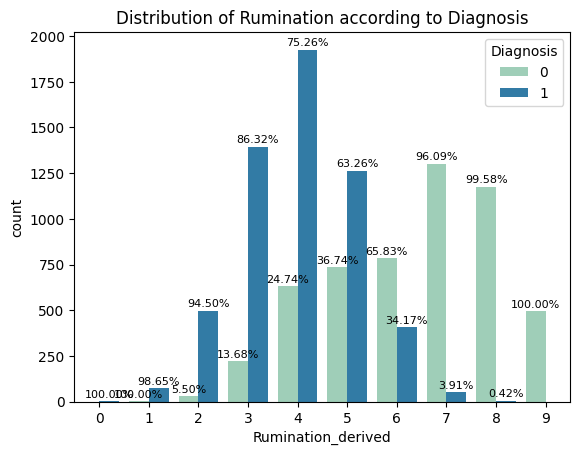

In [ ]:
# Make derived variable of 'Rumination'
data['Rumination_derived'] = data['Rumination'].apply(category)

ax = sns.countplot(x='Rumination_derived', hue="Diagnosis", data=data, palette='YlGnBu')
Rumination_value = 0
Diagnosis_value = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Rumination_derived'] == Rumination_value])
    rat = len(data[(data['Rumination_derived'] == Rumination_value) & (data['Diagnosis'] == Diagnosis_value)])
    if (rat == 0):
        Rumination_value += 1
        sum = len(data.loc[data['Tension_derived'] == Rumination_value])
        rat = len(data[(data['Tension_derived'] == Rumination_value) & (data['Diagnosis'] == Diagnosis_value)])
    if ((iteration_value < 18) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Rumination_value += 1
        iteration_value += 1
    if (Rumination_value > 9):
        Rumination_value = 0
        Diagnosis_value = 1
plt.title('Distribution of Rumination according to Diagnosis')
plt.show()

##### Tension vs Diagnosis

In [ ]:
print('Maximum of Tension:', data['Tension'].max())
print('Minimum of Tension:', data['Tension'].min())

Maximum of Tension: 6.999820269
Minimum of Tension: 1.003486328


In [ ]:
for i in range(1, 7):
    for j in range(0, 2):
        print(len(data[(data['Tension_derived'] == i) & (data['Diagnosis'] == j)]))

919
0
1258
1
868
92
554
645
851
1985
926
2901


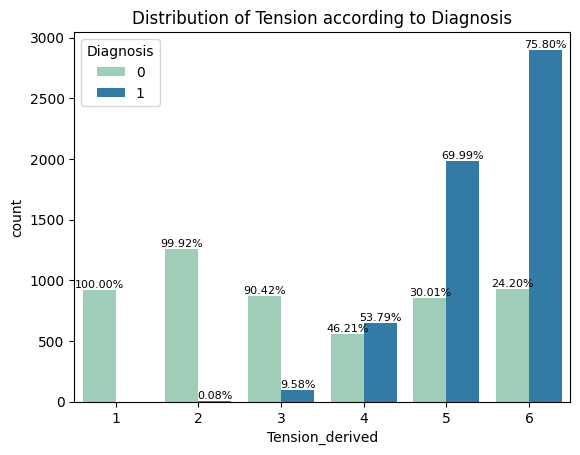

In [ ]:
# Make derived variable of 'Tension'
data['Tension_derived'] = data['Tension'].apply(category)

ax = sns.countplot(x='Tension_derived', hue="Diagnosis", data=data, palette='YlGnBu')
Tension_value = 1
Diagnosis_value = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Tension_derived'] == Tension_value])
    rat = len(data[(data['Tension_derived'] == Tension_value) & (data['Diagnosis'] == Diagnosis_value)])
    if (rat == 0):
        Tension_value += 1
        sum = len(data.loc[data['Tension_derived'] == Tension_value])
        rat = len(data[(data['Tension_derived'] == Tension_value) & (data['Diagnosis'] == Diagnosis_value)])
    if ((iteration_value < 11) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Tension_value += 1
        iteration_value += 1
    if (Tension_value > 6):
        Tension_value = 1
        Diagnosis_value = 1
plt.title('Distribution of Tension according to Diagnosis')
plt.show()

##### Delusion vs Diagnosis

In [ ]:
print('Maximum of Delusion:', data['Delusion'].max())
print('Minimum of Delusion:', data['Delusion'].min())

Maximum of Delusion: 6.971973892
Minimum of Delusion: 1.00002222


In [ ]:
# Make derived variable of 'Delusion'
data['Delusion_derived'] = data['Delusion'].apply(category)

for i in range(1, 7):
    for j in range(0, 2):
        print(len(data[(data['Delusion_derived'] == i) & (data['Diagnosis'] == j)]))

2938
564
1899
1722
496
2061
39
1068
4
192
0
17


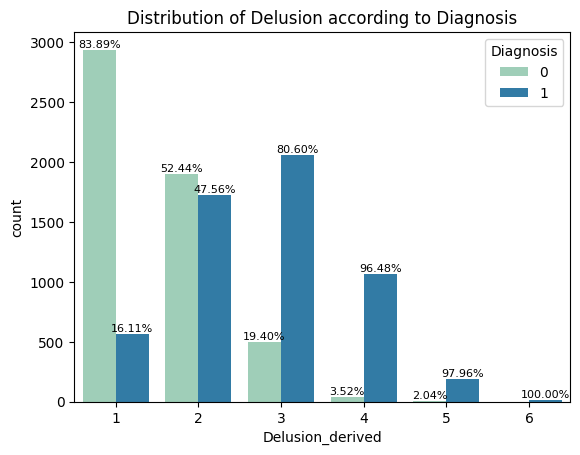

In [ ]:
ax = sns.countplot(x='Delusion_derived', hue="Diagnosis", data=data, palette='YlGnBu')
Delusion_value = 1
Diagnosis_value = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Delusion_derived'] == Delusion_value])
    rat = len(data[(data['Delusion_derived'] == Delusion_value) & (data['Diagnosis'] == Diagnosis_value)])
    if (rat == 0):
        Delusion_value += 1
        if (Delusion_value > 6):
            Delusion_value = 1
            Diagnosis_value = 1
        sum = len(data.loc[data['Delusion_derived'] == Delusion_value])
        rat = len(data[(data['Delusion_derived'] == Delusion_value) & (data['Diagnosis'] == Diagnosis_value)])
    if ((iteration_value < 11) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Delusion_value += 1
        iteration_value += 1
    if (Delusion_value > 6):
        Delusion_value = 1
        Diagnosis_value = 1
plt.title('Distribution of Delusion according to Diagnosis')
plt.show()

##### Rumination vs Race

In [ ]:
Race_value = ['Asian', 'Hispanic', 'Black', 'White']
for i in range(0, 10):
    for j in range(0, 4):
        print(len(data[(data['Rumination_derived'] == i) & (data['Race'] == Race_value[j])]))

0
0
1
1
5
5
45
19
55
50
268
154
222
203
675
516
390
387
876
906
316
302
616
764
202
167
383
442
213
192
398
552
169
166
374
472
71
81
142
200


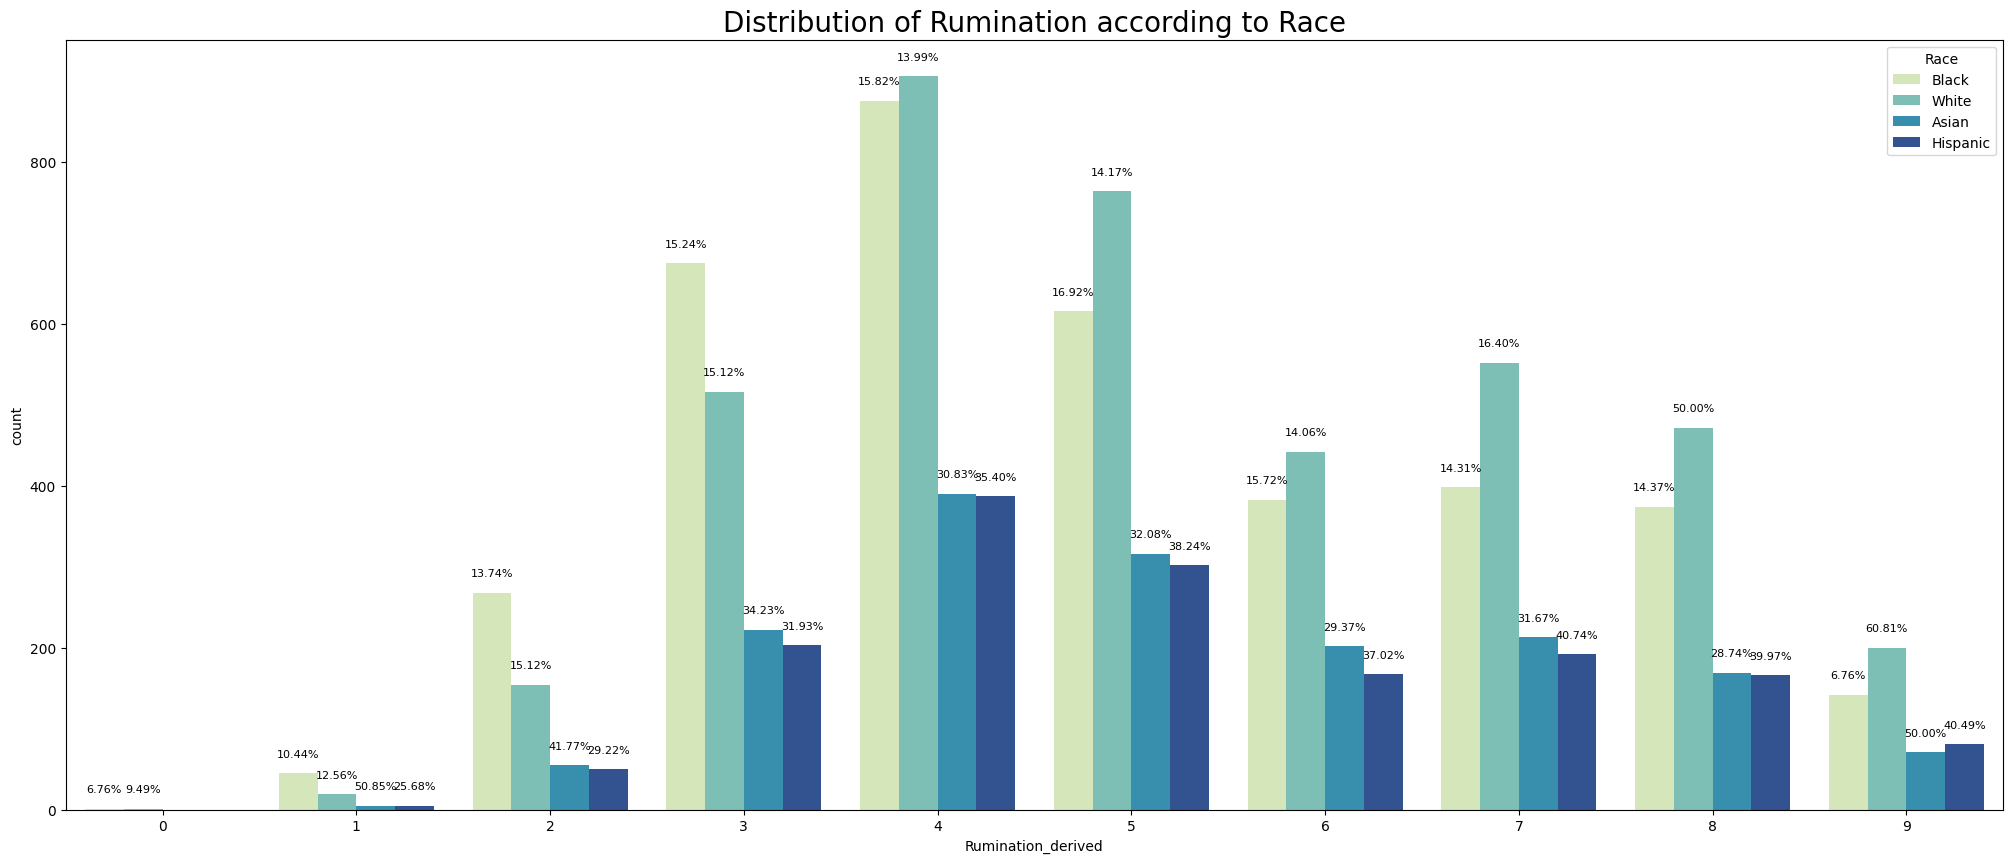

In [ ]:
# Make derived variable of 'Rumination'
data['Rumination_derived'] = data['Rumination'].apply(category)

plt.figure(figsize=(25, 10))
ax = sns.countplot(x='Rumination_derived', hue="Race", data=data, palette='YlGnBu')
Rumination_value = 0
Race_value = ['Asian', 'Hispanic', 'Black', 'White']
Race_index = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Rumination_derived'] == Rumination_value])
    rat = len(data[(data['Rumination_derived'] == Rumination_value) & (data['Race'] == Race_value[Race_index])])
    if (rat == 0):
        Rumination_value += 1
        sum = len(data.loc[data['Rumination_derived'] == Rumination_value])
        rat = len(data[(data['Rumination_derived'] == Rumination_value) & (data['Race'] == Race_value[Race_index])])
    if ((iteration_value < 38) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Rumination_value += 1
        iteration_value += 1
    if (Rumination_value > 9):
        Rumination_value = 0
        Race_index += 1
    if (Race_index > 3):
        Race_index = 0
plt.title('Distribution of Rumination according to Race', fontsize=20)
plt.show()

##### Tension vs Race

In [ ]:
Race_value = ['Asian', 'Hispanic', 'Black', 'White']
for i in range(1, 6):
    for j in range(0, 4):
        print(len(data[(data['Rumination_derived'] == i) & (data['Race'] == Race_value[j])]))

5
5
45
19
55
50
268
154
222
203
675
516
390
387
876
906
316
302
616
764


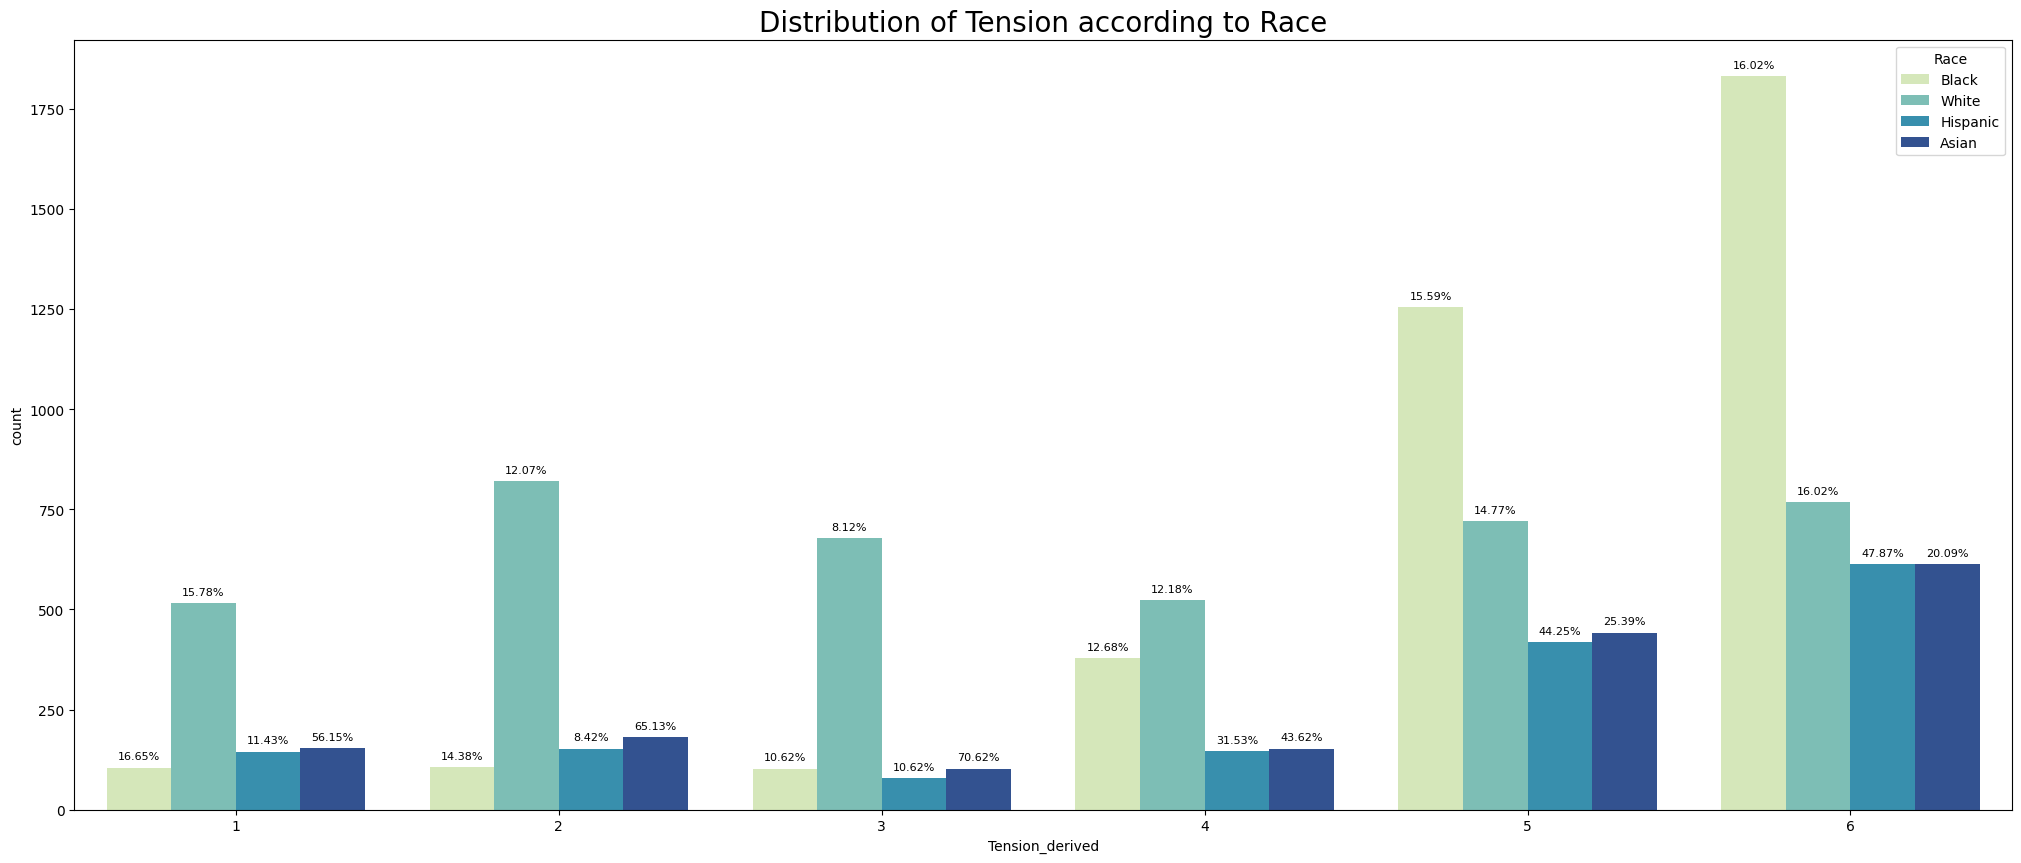

In [ ]:
# Make derived variable of 'Tension'
data['Tension_derived'] = data['Tension'].apply(category)

plt.figure(figsize=(25, 10))
ax = sns.countplot(x='Tension_derived', hue="Race", data=data, palette='YlGnBu')
Tension_value = 0
Race_value = ['Asian', 'Hispanic', 'Black', 'White']
Race_index = 0
iteration_value = 0
for p in ax.patches:
    sum = len(data.loc[data['Tension_derived'] == Tension_value])
    rat = len(data[(data['Tension_derived'] == Tension_value) & (data['Race'] == Race_value[Race_index])])
    if (rat == 0):
        Tension_value += 1
        sum = len(data.loc[data['Tension_derived'] == Tension_value])
        rat = len(data[(data['Tension_derived'] == Tension_value) & (data['Race'] == Race_value[Race_index])])
    if ((iteration_value < 24) & (sum != 0)):
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() + 20, f'{rat / sum * 100:.2f}%', ha = 'center', size = 8)
        Tension_value += 1
        iteration_value += 1
    if (Tension_value > 6):
        Tension_value = 0
        Race_index += 1
    if (Race_index > 3):
        Race_index = 0
plt.title('Distribution of Tension according to Race', fontsize=20)
plt.show()

In [ ]:
# Remove columns of derived variables
data.drop('Anhedonia_derived', axis=1, inplace=True)
data.drop('DepMood_derived', axis=1, inplace=True)
data.drop('Rumination_derived', axis=1, inplace=True)
data.drop('Tension_derived', axis=1, inplace=True)
data.drop('Delusion_derived', axis=1, inplace=True)

### **이상치 탐지**

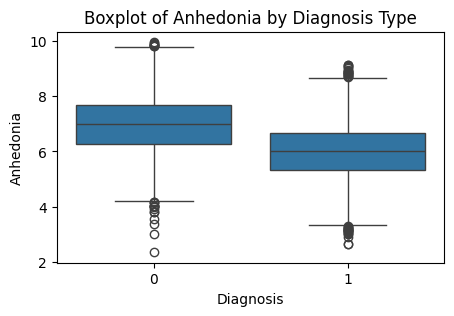

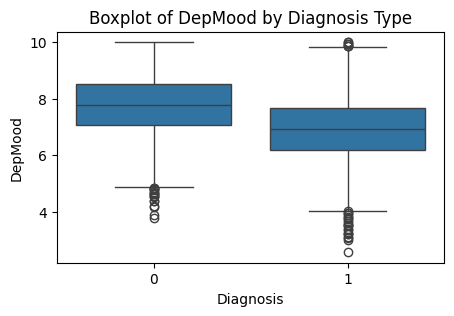

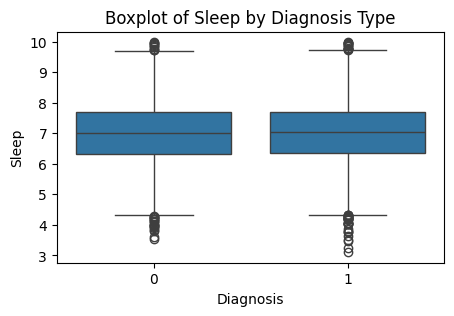

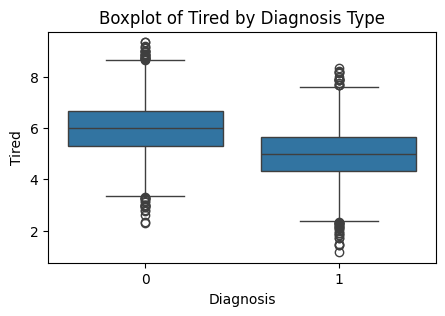

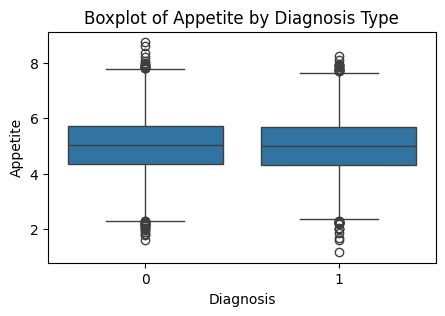

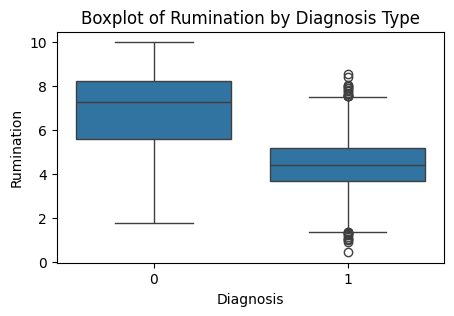

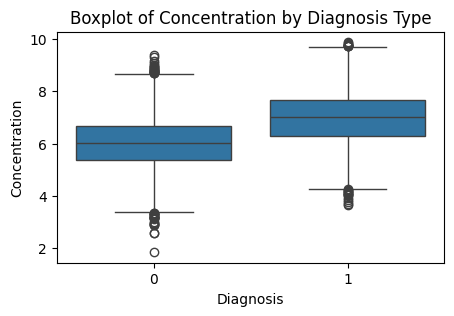

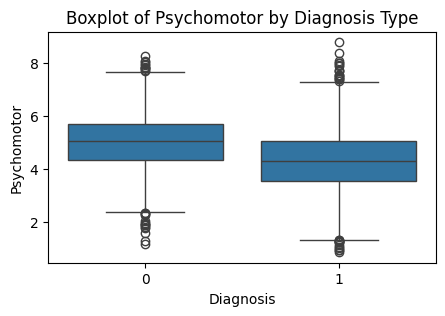

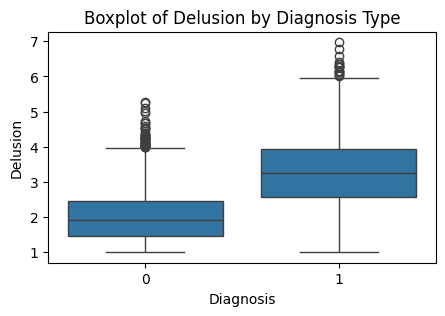

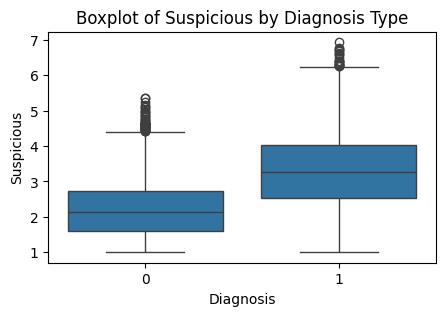

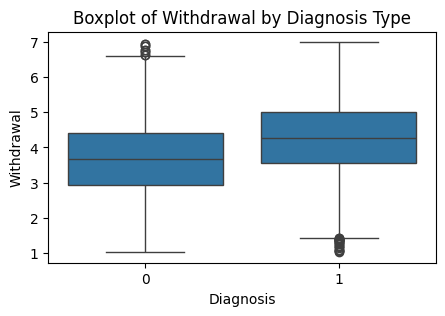

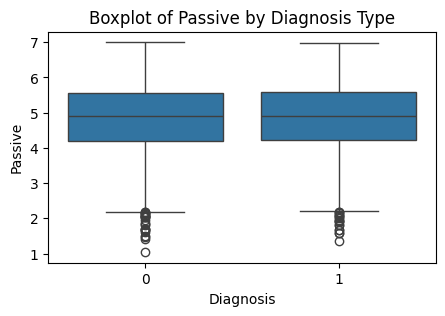

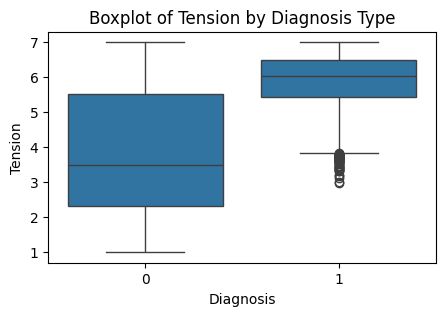

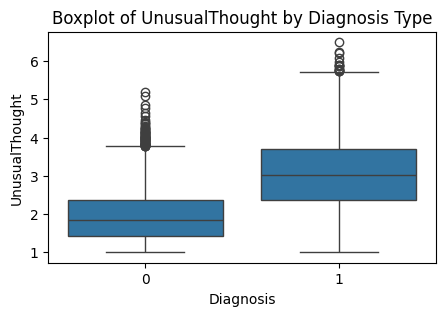

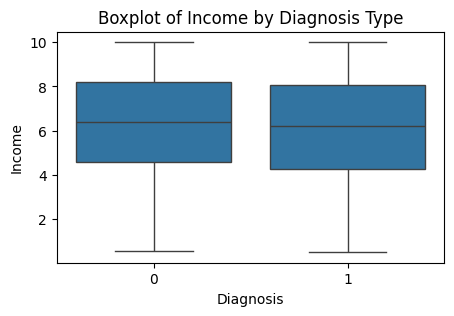

In [ ]:
# Draw box plots for each numerical variables
def plot_boxplots(df):
    for col in df.columns[1:]:  # except 'Diagnosis'
        plt.figure(figsize=(5, 3))
        sns.boxplot(x='Diagnosis', y=col, data=df)
        plt.title(f'Boxplot of {col} by Diagnosis Type')
        plt.show()

numerical_columns = ['Diagnosis', 'Anhedonia', 'DepMood', 'Sleep', 'Tired', 'Appetite', 'Rumination', 'Concentration', 'Psychomotor', 'Delusion', 'Suspicious', 'Withdrawal', 'Passive', 'Tension', 'UnusualThought', 'Income']
plot_boxplots(data[numerical_columns])

In [ ]:
# Use IQR(Interquartile Range) to set outlier boundary
Q3 = data.quantile(0.75, numeric_only=True)    # Q3: top 25% when data is sorted in ascending order
Q1 = data.quantile(0.25, numeric_only=True)    # Q1: bottom 25% when data is sorted in ascending order

IQR = Q3 - Q1
print(IQR)

Diagnosis         1.000000
Anhedonia         1.527080
DepMood           1.572408
Sleep             1.349713
Tired             1.510825
Appetite          1.357015
Rumination        3.015393
Concentration     1.521737
Psychomotor       1.501319
Delusion          1.580718
Suspicious        1.565079
Withdrawal        1.516920
Passive           1.347572
Tension           2.702296
UnusualThought    1.458348
Income            3.721516
dtype: float64


In [ ]:
# Detect outliers
# upper limit = Q3 + 1.5 * IQR
# lower limit = Q1 - 1.5 * IQR
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print(data[(outliers.any(axis=1))])     # print outlier

<ipython-input-98-4b25970bc142>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


     Diagnosis     Sex   Race   Housing Delay  Anhedonia   DepMood     Sleep  \
37           0  Female  White    Stable   Yes   9.829397  7.768593  6.292918   
95           1    Male  White    Stable    No   4.667130  6.117756  6.704427   
114          0  Female  White    Stable    No   8.660250  8.108526  7.664668   
137          0  Female  White    Stable    No   5.429319  6.926649  6.905332   
153          1  Female  Asian    Stable    No   5.393445  6.299542  7.487023   
..         ...     ...    ...       ...   ...        ...       ...       ...   
955          1    Male  Black    Stable   Yes   5.724469  5.790065  7.938488   
959          1  Female  Black  Unstable    No   6.750813  3.904560  6.348446   
961          1    Male  White    Stable   Yes   6.406025  5.946543  6.807429   
975          0  Female  Black  Unstable    No   6.058997  7.495684  5.412681   
993          1    Male  Black    Stable   Yes   5.859825  7.430710  8.386573   

        Tired  Appetite  Rumination  Co

In [ ]:
# Replace outliers with median value
def replace_outlier_with_median(df):
    for col in df.columns[5:]:
        median = df.loc[(df[col] >= Q1[col] - 1.5 * IQR[col]) & (df[col] <= Q3[col] + 1.5 * IQR[col]), col].median()
        df.loc[(df[col] < Q1[col] - 1.5 * IQR[col]) | (df[col] > Q3[col] + 1.5 * IQR[col]), col] = median
    return df

data_cleaned = replace_outlier_with_median(data)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       11000 non-null  int64  
 1   Sex             11000 non-null  object 
 2   Race            11000 non-null  object 
 3   Housing         11000 non-null  object 
 4   Delay           11000 non-null  object 
 5   Anhedonia       11000 non-null  float64
 6   DepMood         11000 non-null  float64
 7   Sleep           11000 non-null  float64
 8   Tired           11000 non-null  float64
 9   Appetite        11000 non-null  float64
 10  Rumination      11000 non-null  float64
 11  Concentration   11000 non-null  float64
 12  Psychomotor     11000 non-null  float64
 13  Delusion        11000 non-null  float64
 14  Suspicious      11000 non-null  float64
 15  Withdrawal      11000 non-null  float64
 16  Passive         11000 non-null  float64
 17  Tension         11000 non-null  f

### **Split the dataset**

In [ ]:
# X_train = train.drop('Diagnosis', axis=1)
# y_train = train['Diagnosis']
# X_test = test.drop('Diagnosis', axis=1)
# y_test = test['Diagnosis']

X_train = data[:10000].drop('Diagnosis', axis=1)
y_train = data[:10000]['Diagnosis']
X_test = data[10000:].drop('Diagnosis', axis=1)
y_test = data[10000:]['Diagnosis']

##### Encoding

In [ ]:
print(X_train['Sex'].value_counts(), '\n')
print(X_train['Race'].value_counts(), '\n')
print(X_train['Housing'].value_counts(), '\n')
print(X_train['Delay'].value_counts())

Female    5535
Male      4465
Name: Sex, dtype: int64 

White       3638
Black       3421
Asian       1528
Hispanic    1413
Name: Race, dtype: int64 

Stable      9462
Unstable     538
Name: Housing, dtype: int64 

Yes    5127
No     4873
Name: Delay, dtype: int64


In [ ]:
print(X_test['Sex'].value_counts(), '\n')
print(X_test['Race'].value_counts(), '\n')
print(X_test['Housing'].value_counts(), '\n')
print(X_test['Delay'].value_counts())

Female    528
Male      472
Name: Sex, dtype: int64 

White       388
Black       357
Hispanic    140
Asian       115
Name: Race, dtype: int64 

Stable      844
Unstable    156
Name: Housing, dtype: int64 

Yes    548
No     452
Name: Delay, dtype: int64


In [ ]:
# Encoding
X_train['Sex'] = X_train['Sex'].map({'Male': 1, 'Female': 0})
X_train['Race'] = X_train['Race'].map({'White': 3, 'Black': 2, 'Asian': 1, 'Hispanic': 0})
X_train['Housing'] = X_train['Housing'].map({'Stable': 1, 'Unstable': 0})
X_train['Delay'] = X_train['Delay'].map({'Yes': 1, 'No': 0})

X_test['Sex'] = X_test['Sex'].map({'Male': 1, 'Female': 0})
X_test['Race'] = X_test['Race'].map({'White': 3, 'Black': 2, 'Asian': 1, 'Hispanic': 0})
X_test['Housing'] = X_test['Housing'].map({'Stable': 1, 'Unstable': 0})
X_test['Delay'] = X_test['Delay'].map({'Yes': 1, 'No': 0})

##### 정규화

In [ ]:
# Normalization: StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
print(X_train_scaled[:3])
print(X_test_scaled[:3])

[[ 1.11339196 -0.89473233  0.23845128 -1.02573093 -0.63716972  0.53312778
  -0.48325625  0.29093407  0.58754647  0.16215423 -0.59822064 -0.88644201
   0.85949364 -1.26591771  0.2846296   0.96678983  1.10355136 -1.35899813
   1.10500815]
 [ 1.11339196 -1.85846815  0.23845128 -1.02573093  0.73137352  1.11423172
  -1.64081993  1.03629344  1.11580244 -0.49966575 -0.42711452  0.65366748
  -0.53356021 -0.22975239 -0.93432481  0.02893056 -1.11063235 -0.88168709
  -0.70087596]
 [-0.8981563   0.06900348 -4.19372872 -1.02573093 -0.90542478 -0.66806261
   0.29684926  0.23535458 -0.91256617 -0.88918192  0.60975013  0.84144772
   0.41537986 -1.12213124  1.25893882  0.46712504  1.06002728  0.53468285
  -2.44889198]]
[[ 1.11339196  1.0327393   0.23845128  0.97491454  0.04301697 -0.59591403
  -0.82263899 -0.36791044  0.49333695 -1.45574219  0.57140525  0.06718762
   0.12749658  0.72865984  1.36965127 -0.02380028  1.00938659 -1.32862775
  -0.21803987]
 [-0.8981563  -0.89473233  0.23845128 -1.02573093 -